## Practice with Decision Trees and Random Forests

### Step 1 - Import Libraries

In [1]:
# Data Analysis
# Import pandas for data manipulation
# Import numpy for computations

import pandas as pd
import numpy as np

In [2]:
# Data Visualization
# Import matplotlib.pyplot for data visualization
# Import seaborn for additional data visualization features
# matplotlib inline to display visuals in jupyter notebook

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2 - Import Data


In [3]:
# Import dataset stored in local directory

df = pd.read_csv('kyphosis.csv')

In [4]:
# Review the first few columns of the dataset
# Kyphosis -> this is the target column
# Age -> this is the age in months of the patient
# Number -> this is the number of vertebrae involved in the operation
# Start -> this is the top most vertebrae operated on

df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### Step 3 - Conduct Exploratory Analysis


In [5]:
# Review the amount of rows, columns and data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [6]:
# Review the statistical breakdown of numerical features within the dataset
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


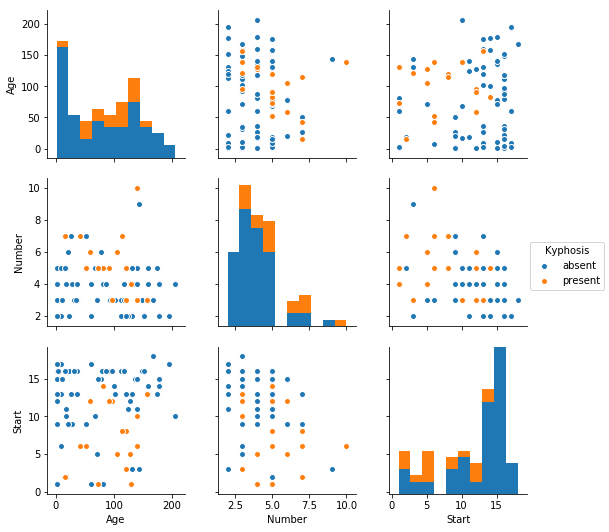

In [7]:
# Use seaborn pairplot to identify feature correlations

sns.pairplot(data=df, hue='Kyphosis')

### Section - Machine Learning


### Step 4 - Conduct Train/ Test Split of dataset

In [8]:
# Import the module to split the data
from sklearn.model_selection import train_test_split

In [9]:
# Assign the features to the X variable and the Target to the y variable

X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [10]:
# Split the data into test and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Step 5 - Train a Single Decision Tree

In [11]:
# Import to Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [12]:
# Create an object of the Classifier by instantiating it

dtree = DecisionTreeClassifier()

In [13]:
# Train (i.e. fit) the model

dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# Evaluate the accuracy of the model

predictions = dtree.predict(X_test)
predictions

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [15]:
# Import the confusion matrix and classification report to assess the model

from sklearn.metrics import classification_report, confusion_matrix

In [16]:
# Review the confusion matrix and classification report

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[22  1]
 [ 0  2]]


             precision    recall  f1-score   support

     absent       1.00      0.96      0.98        23
    present       0.67      1.00      0.80         2

avg / total       0.97      0.96      0.96        25



### Step 6 - Train with a Random Forest

In [17]:
# Import the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [18]:
# Create an object of the Classifier by instantiating it
# n_estimators -> identifies the number of trees in the forest

rfc = RandomForestClassifier(n_estimators=200)

In [19]:
# Train (i.e. fit) the model

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
# Evaluate the accuracy of the model

rfc_predict = rfc.predict(X_test)
rfc_predict

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [21]:
# Review the confusion matrix and classification report

print(confusion_matrix(y_test, rfc_predict))
print('\n')
print(classification_report(y_test, rfc_predict))

[[22  1]
 [ 1  1]]


             precision    recall  f1-score   support

     absent       0.96      0.96      0.96        23
    present       0.50      0.50      0.50         2

avg / total       0.92      0.92      0.92        25



### Step 7 - Visualize Single Decision Trees

In [22]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

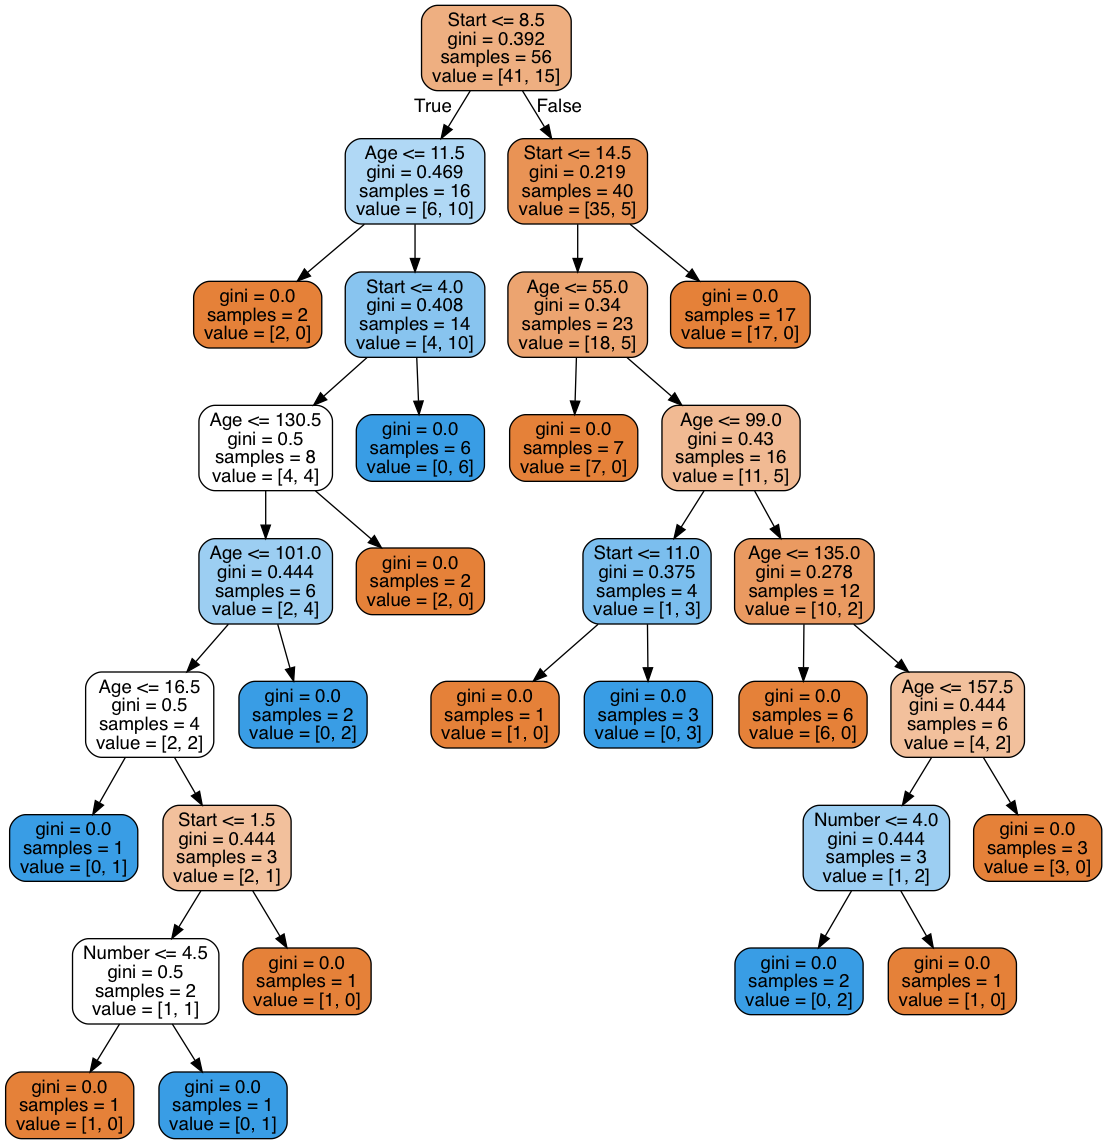

In [23]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 